In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [5]:
DATA_STORE = '../data/assets.h5'

In [8]:
signal = (pd.read_hdf(DATA_STORE, 'sp500/fred')
          .loc['2012': '2014']
          .close.pct_change()
          .dropna())

In [10]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

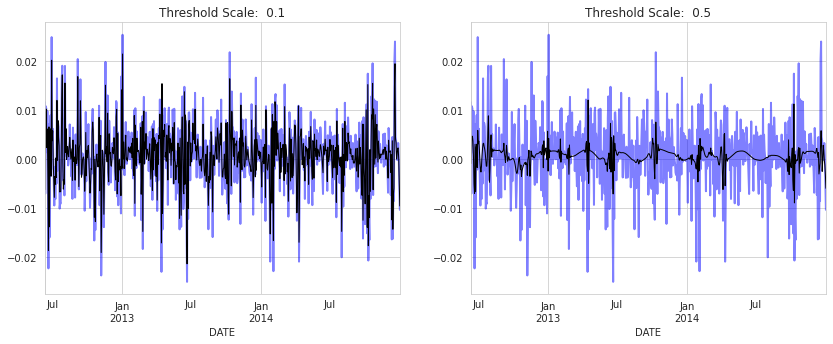

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

wavelet = 'db6'
for i, scale in enumerate([.1, .5]):
    coefficients = pywt.wavedec(signal, wavelet, mode='per')
    coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
    reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
    signal.plot(color='b', alpha=0.5, label='origianl signal', lw=2, title=f'Threshold Scale: {scale: .1f}', ax=axes[i])
    pd.Series(reconstructed_signal[:-1], index=signal.index).plot(c='k', label='DWT smoothing', linewidth=1, ax=axes[i])